In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


pd.set_option("display.max_columns", None)

In [2]:
def get_rc(i, cols):
    r = i // cols + 1
    c = i % cols + 1

    return (r, c)


def get_rows_columns(df, c=5):
    COLUMNS = c
    d, m = divmod(df.shape[0], COLUMNS)
    ROWS = d + (1 if m > 0 else m)

    return ROWS, COLUMNS


def get_fig_subplots(df, ROWS, COLUMNS):
    fig = make_subplots(
        rows=ROWS,
        cols=COLUMNS,
        subplot_titles=df.index.values,
        specs=[[{"type": "polar"} for _ in range(COLUMNS)] for _ in range(ROWS)],
    )

    return fig


def get_min_max_value(df, columns):
    min_value = df[columns].unstack().min()
    max_value = df[columns].unstack().max()

    return min_value, max_value


def get_theta_list(df, name, origin_columns):
    return [
        f"{col} - {round(value, ndigits=2)} | {int(standing)}"
        for col, value, standing in zip(
            origin_columns,
            df.loc[name, origin_columns].values,
            df[origin_columns].rank(method="min", ascending=False).loc[name].values,
        )
    ]

In [3]:
# SCALER = StandardScaler
SCALER = MinMaxScaler
# SCALER = MaxAbsScaler

In [4]:
teams_stats = pd.read_csv("./csv/stats/teams.csv", index_col="Team")
print(teams_stats.shape)
teams_stats.head()

(10, 12)


,Games,Win,Loss,WinRate,KD,CKPM,GameDuration,WinGameDuration,LossGameDuration,GPM,GDPM,KPM
Team,,,,,,,,,,,,
DRX,11.0,1.0,10.0,0.090909,0.346591,0.748837,28.746970,34.450000,28.176667,1562.023335,-429.826947,0.168080
Dplus KIA,12.0,7.0,5.0,0.583333,1.457447,0.631555,30.906944,30.061905,32.090000,1837.881009,114.495395,0.374791
Gen.G,12.0,10.0,2.0,0.833333,1.658824,0.673471,27.709722,27.840000,27.058333,1936.876723,259.105160,0.424899
Hanwha Life Esports,10.0,6.0,4.0,0.600000,1.464789,0.572555,31.270000,33.177778,28.408333,1800.189333,61.911603,0.346820
KT Rolster,12.0,9.0,3.0,0.750000,1.588889,0.718916,27.948611,28.159259,27.316667,1917.934730,181.627248,0.456530


In [5]:
scaler = SCALER()
origin_columns = ["KD", "CKPM", "KPM", "GPM", "GDPM"]
columns = ["_" + col for col in origin_columns]
teams_stats[columns] = scaler.fit_transform(teams_stats[origin_columns])
teams_stats.head()

,Games,Win,Loss,WinRate,KD,CKPM,GameDuration,WinGameDuration,LossGameDuration,GPM,GDPM,KPM,_KD,_CKPM,_KPM,_GPM,_GDPM
Team,,,,,,,,,,,,,,,,,
DRX,11.0,1.0,10.0,0.090909,0.346591,0.748837,28.746970,34.450000,28.176667,1562.023335,-429.826947,0.168080,0.000000,1.000000,0.000000,0.000000,0.000000
Dplus KIA,12.0,7.0,5.0,0.583333,1.457447,0.631555,30.906944,30.061905,32.090000,1837.881009,114.495395,0.374791,0.846539,0.520182,0.716626,0.735908,0.790096
Gen.G,12.0,10.0,2.0,0.833333,1.658824,0.673471,27.709722,27.840000,27.058333,1936.876723,259.105160,0.424899,1.000000,0.691667,0.890341,1.000000,1.000000
Hanwha Life Esports,10.0,6.0,4.0,0.600000,1.464789,0.572555,31.270000,33.177778,28.408333,1800.189333,61.911603,0.346820,0.852134,0.278800,0.619656,0.635358,0.713769
KT Rolster,12.0,9.0,3.0,0.750000,1.588889,0.718916,27.948611,28.159259,27.316667,1917.934730,181.627248,0.456530,0.946706,0.877592,1.000000,0.949468,0.887539


C:\Users\pjm58\AppData\Local\Temp\ipykernel_70008\879664895.py:6: RuntimeWarning: divide by zero encountered in divide
  x = 100 / y


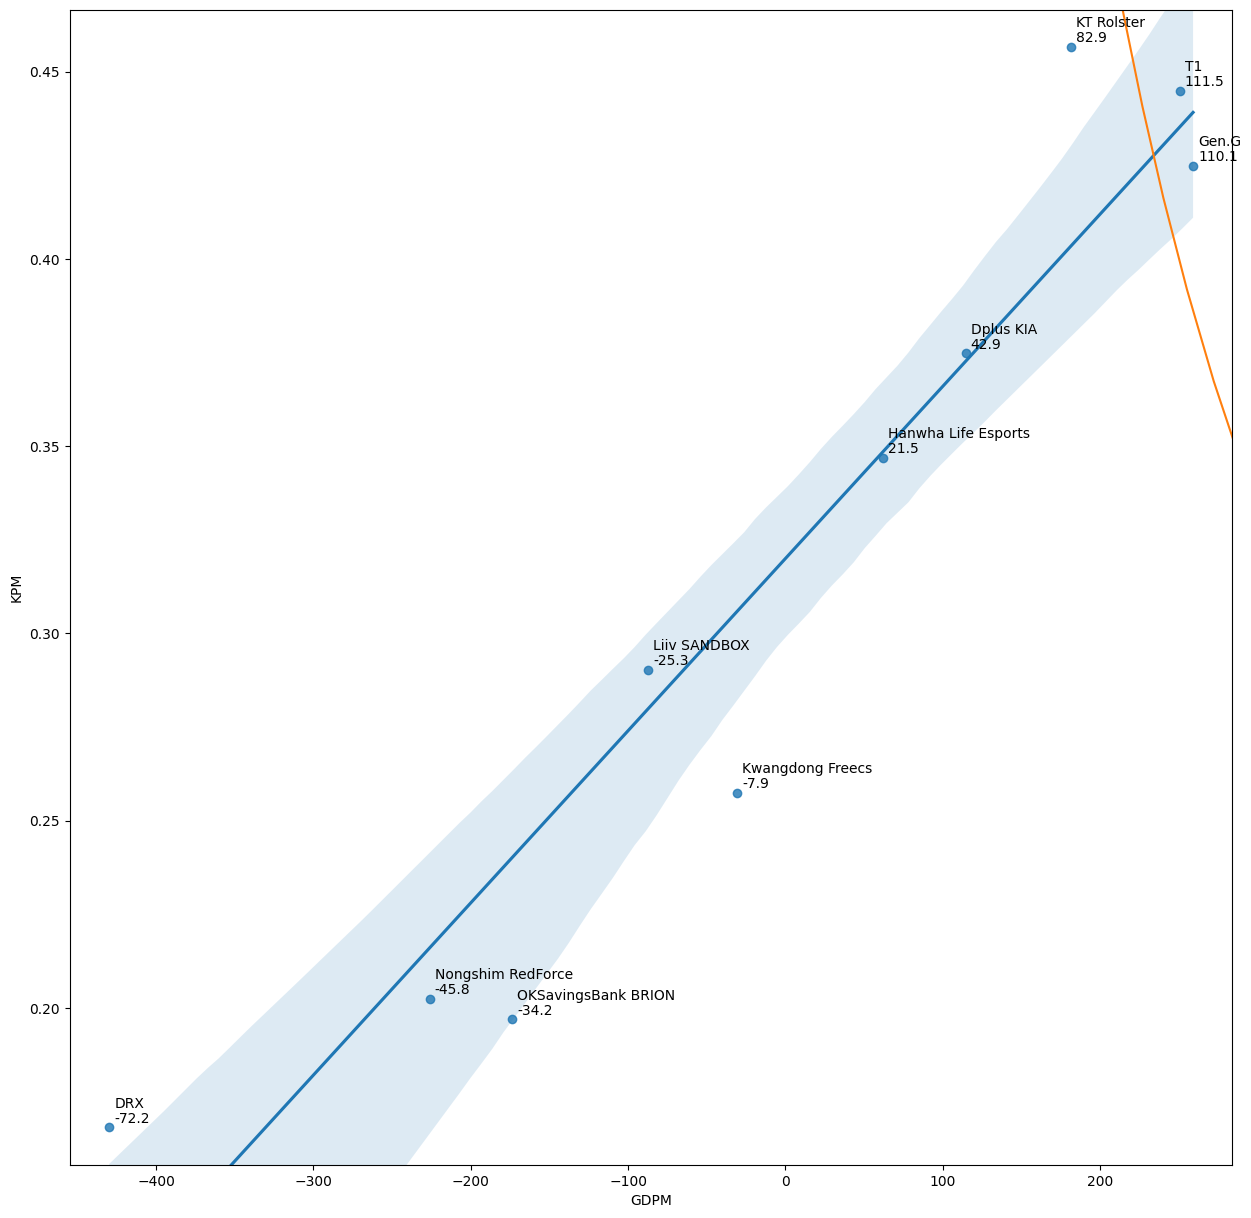

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.set_xlim(teams_stats["GDPM"].min() - 25, teams_stats["GDPM"].max() + 25)
ax.set_ylim(teams_stats["KPM"].min() - 0.01, teams_stats["KPM"].max() + 0.01)
ax = sns.regplot(data=teams_stats, x="GDPM", y="KPM")
y = np.linspace(0, 1.2)
x = 100 / y
sns.lineplot(x=x, y=y)
for idx, i in zip(teams_stats.index, range(teams_stats.shape[0])):
    row = teams_stats.iloc[i]
    plt.annotate(
        idx, xy=(row["GDPM"], row["KPM"]), xytext=(5, 20), textcoords="offset pixels"
    )
    plt.annotate(
        round(row["GDPM"] * row["KPM"], ndigits=1),
        xy=(row["GDPM"], row["KPM"]),
        xytext=(5, 5),
        textcoords="offset pixels",
    )

In [7]:
ROWS, COLUMNS = get_rows_columns(teams_stats)
min_value, max_value = get_min_max_value(teams_stats, columns)

fig = get_fig_subplots(teams_stats, ROWS, COLUMNS)
for i, team_name in enumerate(teams_stats.index):
    df = teams_stats.loc[team_name, columns]
    theta_list = get_theta_list(teams_stats, team_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=df, theta=theta_list, fill="toself", name=team_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False)
)
fig.show()

In [8]:
players_stats = pd.read_csv("./csv/stats/players_by_position.csv", index_col="Player")
players_stats.shape

(55, 19)

In [9]:
players_stats.columns

Index(['Position', 'Team', 'Games', 'Win', 'Loss', 'WinRate', 'Kills',
       'Deaths', 'Assists', 'KDA', 'DPM', 'CS', 'CSPM', 'Gold', 'GPM', 'KP',
       'KS', 'GS', 'ChampionsPlayed'],
      dtype='object')

In [10]:
players_stats['DPG'] = players_stats['DPM'].divide(players_stats['GPM'])

In [11]:
origin_columns = [
    "KDA",
    "KP",
    "KS",
    "DPM",
    "DPG",
    "CSPM",
    "GPM",
    "GS",
    "ChampionsPlayed",
]
columns = ["_" + col for col in origin_columns]
positions = ["Top", "Jungle", "Mid", "Bot", "Support"]

In [12]:
for position in positions:
    scaler = SCALER()
    df = players_stats.loc[players_stats["Position"] == position]
    players_stats.loc[
        players_stats["Position"] == position, columns
    ] = scaler.fit_transform(df[origin_columns])

In [13]:
df = players_stats.loc[players_stats["Position"] == positions[0]]
min_value, max_value = get_min_max_value(df, columns)

ROWS, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    width=500 * COLUMNS,
    showlegend=False,
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False)
)
fig.show()

In [14]:
df = players_stats.loc[players_stats["Position"] == positions[1]]
min_value, max_value = get_min_max_value(df, columns)

ROWS, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    width=500 * COLUMNS,
    showlegend=False,
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False)
)
fig.show()

In [15]:
df = players_stats.loc[players_stats["Position"] == positions[2]]
min_value, max_value = get_min_max_value(df, columns)

ROWS, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False)
)
fig.show()

In [16]:
df = players_stats.loc[players_stats["Position"] == positions[3]]
min_value, max_value = get_min_max_value(df, columns)

ROWS, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False)
)
fig.show()

In [17]:
df = players_stats.loc[players_stats["Position"] == positions[4]]
min_value, max_value = get_min_max_value(df, columns)

ROWS, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False),
)
fig.update_traces(marker=dict(), selector=dict(type="scatterpolar"))
fig.show()